**Lab | Cleaning numerical data**

1. Import the necessary libraries.

In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [132]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


3. First look at its main features (head, shape, info). NOTE The target column is total_claim_amount

In [133]:
#display(customer_df.info)
display(customer_df.shape)
display(customer_df.head())

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [134]:
cols = []
for i in customer_df.columns:
    cols.append(i.lower())
customer_df.columns = cols
customer_df.columns = customer_df.columns.str.replace(" ", "_")
customer_df.head(0)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size


5. Change effective to date column to datetime format.

In [135]:
customer_df['effective_to_date'].dtypes

dtype('O')

In [136]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


6. Create a NEW dataframe using only the numerical data called numerical_df. Use this for the following questions.

In [137]:
numerical_df = customer_df.select_dtypes(np.number)
numerical_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [138]:
numerical_df.shape

(9134, 8)

7. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [139]:
for i in numerical_df.columns:
    print(numerical_df[i].nunique()/len(numerical_df))


0.8803372016641121
0.6233851543682943
0.022115174074885044
0.003941318151959711
0.010948105977665865
0.0006568863586599519
0.0009853295379899278
0.559010291219619


In [140]:
discrete_df = customer_df[['monthly_premium_auto', 'months_since_last_claim','months_since_policy_inception', 'number_of_open_complaints','number_of_policies']]
discrete_df.head()

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,69,32,5,0,1
1,94,13,42,0,8
2,108,18,38,0,2
3,106,18,65,0,7
4,73,12,44,0,1


In [141]:
continuous_df = customer_df[['customer_lifetime_value','income','total_claim_amount']]
continuous_df.head()

,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879


8. Plot a correlation matrix, comment what you see.

,customer_lifetime_value,income,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.226451
income,0.024366,1.000000,-0.355254
total_claim_amount,0.226451,-0.355254,1.000000


<Axes: >

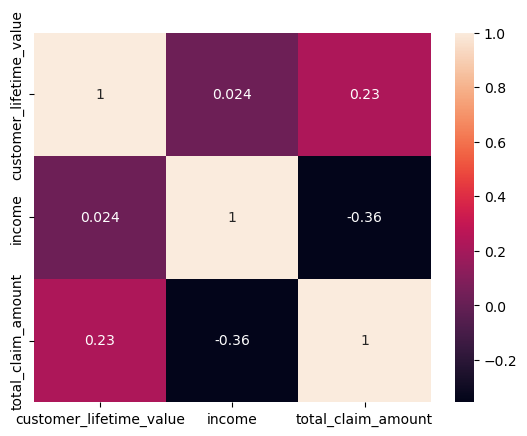

In [142]:
c_corr= continuous_df.corr()
display(c_corr) 
sns.heatmap(c_corr, annot=True)

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
monthly_premium_auto,1.000000,0.005026,0.020257,-0.013122,-0.011233
months_since_last_claim,0.005026,1.000000,-0.042959,0.005354,0.009136
months_since_policy_inception,0.020257,-0.042959,1.000000,-0.001158,-0.013333
number_of_open_complaints,-0.013122,0.005354,-0.001158,1.000000,0.001498
number_of_policies,-0.011233,0.009136,-0.013333,0.001498,1.000000


<Axes: >

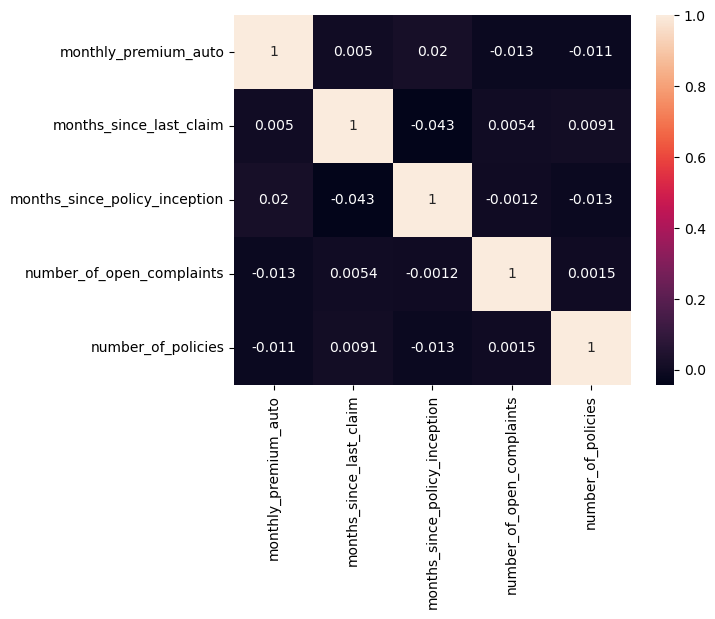

In [143]:
d_corr= discrete_df.corr()
display(d_corr) 
sns.heatmap(d_corr, annot=True)

9. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

In [144]:
def plot_discrete(df):
    for i in df.columns:
        plt.show(sns.countplot(x=i,data=df))
        

In [145]:
discrete_df['number_of_open_complaints'].value_counts()

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: number_of_open_complaints, dtype: int64

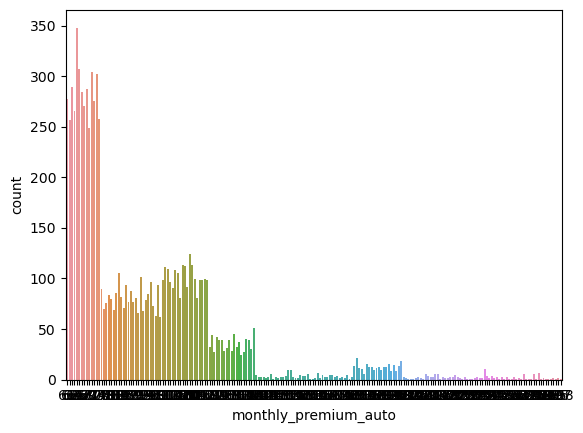

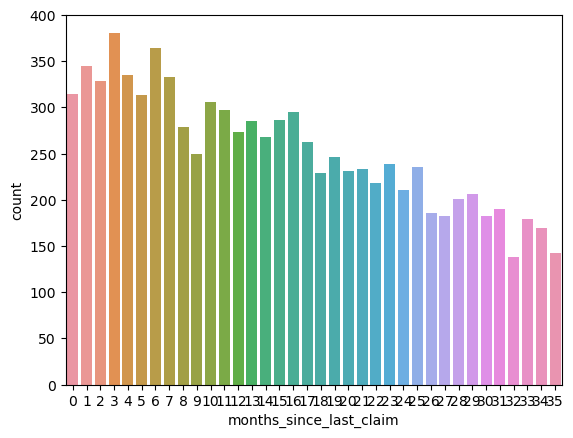

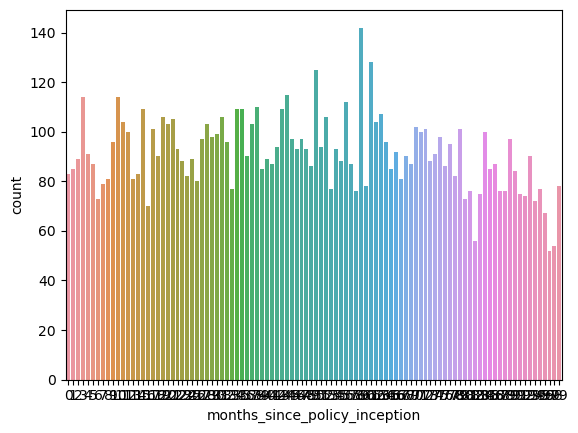

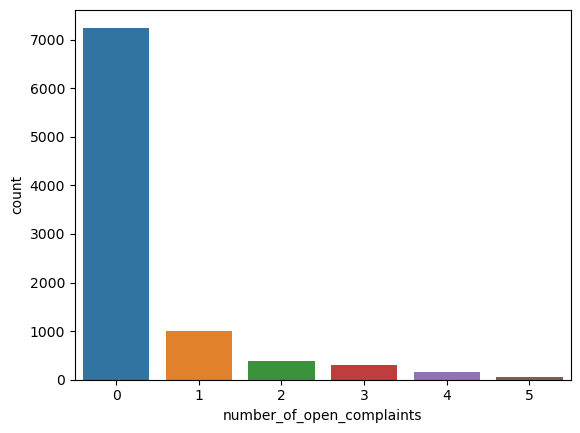

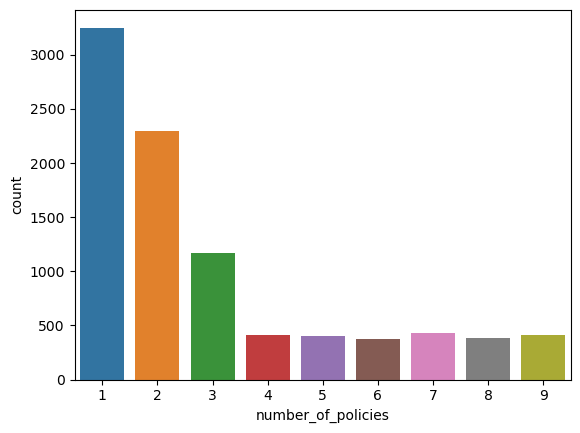

In [146]:
plot_discrete(discrete_df)

In [147]:
def plot_continuous(df):
    for i in df.columns:
        plt.show(continuous_df[i].hist(bins=5))

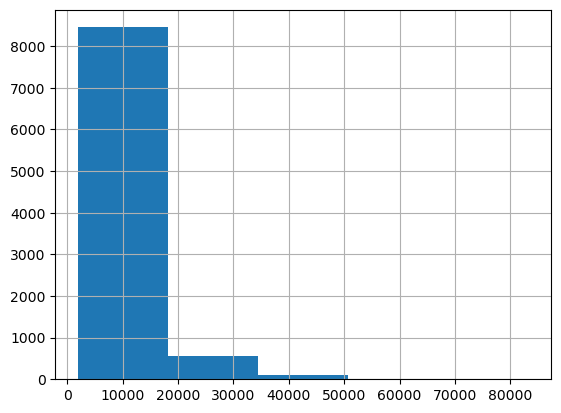

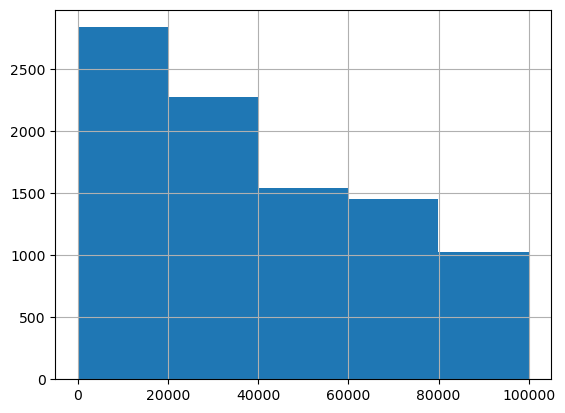

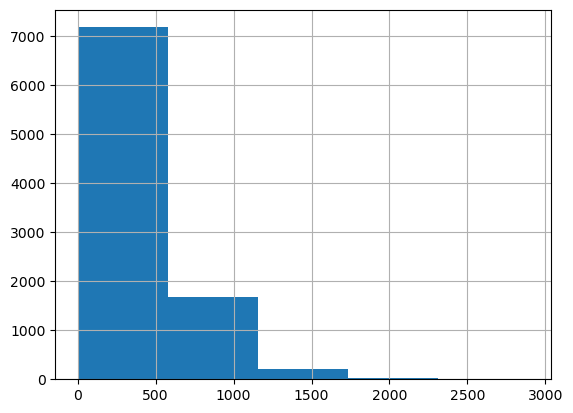

In [148]:
plot_continuous(continuous_df)

10. Comment what you can see in the plots.

In [149]:
# Some of the discrete variables have too many distinct values which makes the graphs hard to read.
# Income and total claim amount values are very skewed with a lot of outliers. 

11. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

In [150]:
def boxplot(df):
    for i in df.columns:
        sns.boxplot(y=df[i])
        plt.show()

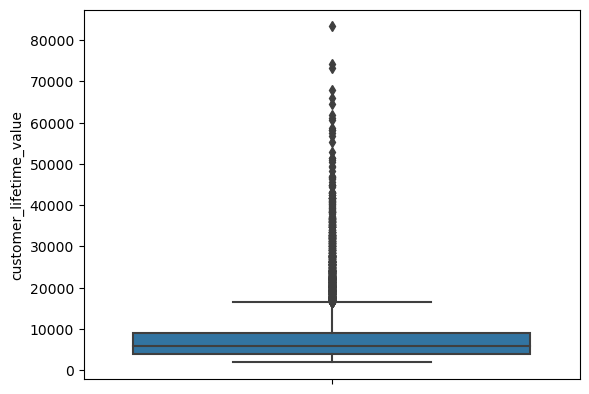

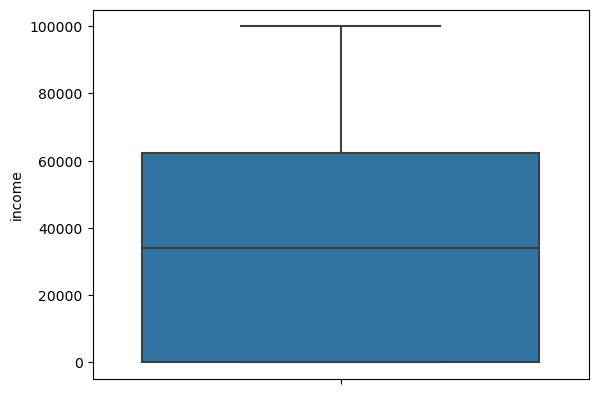

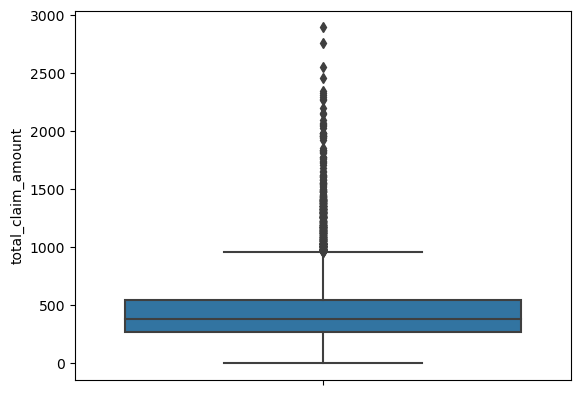

In [151]:
boxplot(continuous_df)

12. Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now. Also, remove them from your main dataframe.

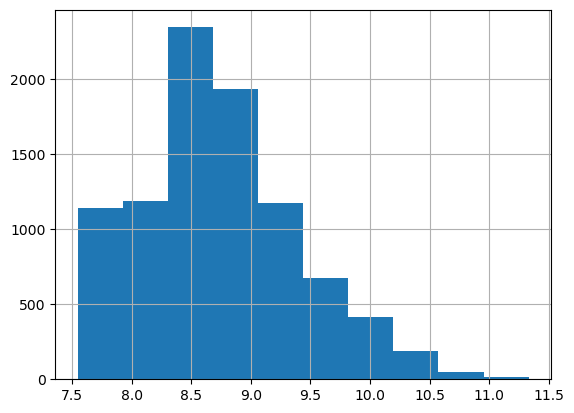

In [152]:
def log_transfom_clean(x):
    if x>0:
        return np.log(x)
    else:
        return np.NAN

pd.Series(continuous_df['customer_lifetime_value'].apply(log_transfom_clean)).hist()
plt.show()


/var/folders/mq/9_lx1p317k12454gn9x3s1zm0000gn/T/ipykernel_18364/2519325721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continuous_df['customer_lifetime_value_transformed'] = continuous_df['customer_lifetime_value'].apply(log_transfom_clean)


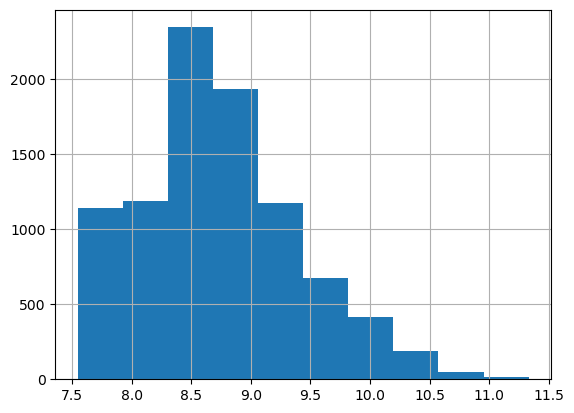

In [153]:
continuous_df['customer_lifetime_value_transformed'] = continuous_df['customer_lifetime_value'].apply(log_transfom_clean)
continuous_df['customer_lifetime_value_transformed'].hist()
plt.show()

<Axes: ylabel='customer_lifetime_value_transformed'>

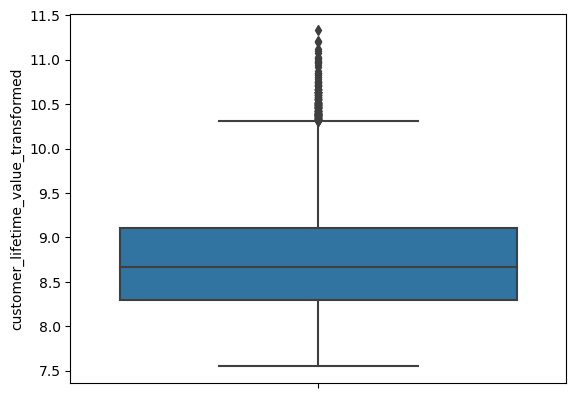

In [154]:
sns.boxplot(y=continuous_df['customer_lifetime_value_transformed'])

<Axes: >

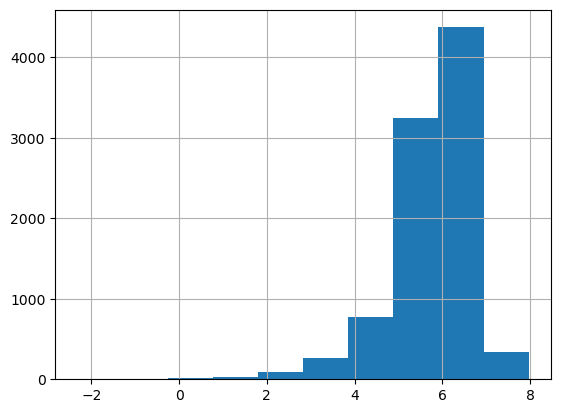

In [155]:
pd.Series(continuous_df['total_claim_amount'].apply(log_transfom_clean)).hist()

/var/folders/mq/9_lx1p317k12454gn9x3s1zm0000gn/T/ipykernel_18364/2076563508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continuous_df['total_claim_amount_transformed'] = continuous_df['total_claim_amount'].apply(log_transfom_clean)


<Axes: ylabel='total_claim_amount_transformed'>

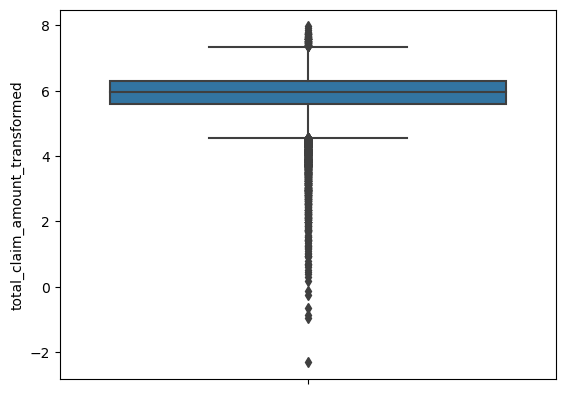

In [467]:
continuous_df['total_claim_amount_transformed'] = continuous_df['total_claim_amount'].apply(log_transfom_clean)
sns.boxplot(y=continuous_df['total_claim_amount_transformed'])

In [468]:
continuous_df['total_claim_amount_transformed'].value_counts(dropna=False)

5.758271    116
5.679490    110
5.743003    108
5.859075    105
5.802722    102
           ... 
5.933419      1
3.043813      1
5.637988      1
5.591475      1
6.673026      1
Name: total_claim_amount_transformed, Length: 5106, dtype: int64

In [469]:
# Checking how many values will be removed if the outliers are removed
iqr = np.nanpercentile(continuous_df['total_claim_amount'],75) - np.nanpercentile(continuous_df['total_claim_amount'],25)
upper_limit = np.nanpercentile(continuous_df['total_claim_amount'],75) + 1.5*iqr
print(upper_limit)

extraordinary_points = continuous_df[continuous_df['total_claim_amount'] > 2300]
print(len(extraordinary_points)) # This checks the number of points that will be removed

960.3997301249999
7


In [470]:
customer_df2 = customer_df[customer_df['total_claim_amount'] <= 2300]
len(customer_df2)

9127

<Axes: ylabel='total_claim_amount'>

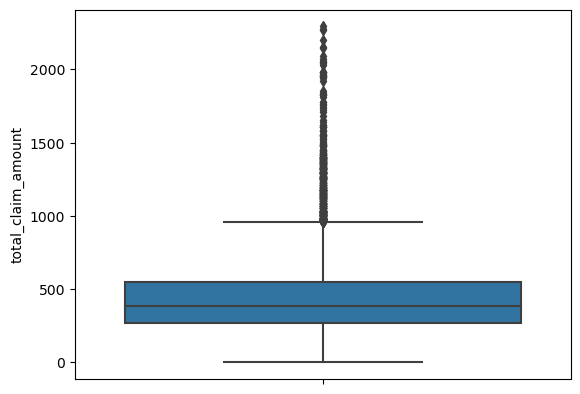

In [471]:
sns.boxplot(y=customer_df2['total_claim_amount'])

13. Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

In [472]:
continuous_df.isna().sum()

customer_lifetime_value                0
income                                 0
total_claim_amount                     0
customer_lifetime_value_transformed    0
total_claim_amount_transformed         0
dtype: int64

14. Save the numerical_df to csv as numerical.csv You will use this file again this week.

In [162]:
numerical_df.to_csv('numerical.csv', index=False)

**Lab | Cleaning categorical data**

1. Open the notebook created for Lab-cleaning-numerical-data.

2. Find all of the categorical data. Save it in a categorical_df variable.

In [163]:
categorical_df = customer_df.select_dtypes(object)

In [164]:
categorical_df.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [165]:
categorical_df.shape

(9134, 15)

3. Check for NaN values and decide what to do with them, do it now.

In [166]:
categorical_df.isna().sum()

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

4. Check all unique values of columns.

In [167]:
categorical_df.nunique()

customer            9134
state                  5
response               2
coverage               3
education              5
employmentstatus       5
gender                 2
location_code          3
marital_status         3
policy_type            3
policy                 9
renew_offer_type       4
sales_channel          4
vehicle_class          6
vehicle_size           3
dtype: int64

In [168]:
#categorical_df = categorical_df.drop('customer', axis=1)
for i in categorical_df.columns:
    print(categorical_df[i].value_counts())

BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: customer, Length: 9134, dtype: int64
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64
No     7826
Yes    1308
Name: response, dtype: int64
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64
F    4658
M    4476
Name: gender, dtype: int64
Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64
Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64
Personal Auto     67

5. Check dtypes. Do they all make sense as categorical data?

In [169]:
categorical_df.dtypes

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

6. Does any column contain alpha and numeric data? Decide how to clean it and do it now.

In [170]:
categorical_df['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [171]:
categorical_df['policy'] = categorical_df['policy'].str.split().str[0]
categorical_df.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal,Offer1,Agent,Four-Door Car,Medsize


In [172]:
categorical_df['policy'].value_counts()

Personal     6788
Corporate    1968
Special       378
Name: policy, dtype: int64

In [173]:
categorical_df['renew_offer_type'].value_counts()

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

7. Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions and do it now.

In [223]:
# eduation: combining Master and Doctor
above_master = ['Master', 'Doctor']
categorical_df['education'] = np.where(categorical_df.education.isin(above_master), 'Master or Above',categorical_df.education)

# eduation: combining Bachelor and College
categorical_df['education'] = np.where(categorical_df.education=='College', 'Bachelor', categorical_df.education)

categorical_df['education'].value_counts()



Bachelor                5429
High School or Below    2622
Master or Above         1083
Name: education, dtype: int64

In [224]:
# employment_status: combining other
categorical_df = categorical_df.rename(columns={'employmentstatus':'employment_status'})
Other = ['Medical Leave','Disabled','Retired']
categorical_df['employment_status'] = np.where(categorical_df.employment_status.isin(Other), 'Other',categorical_df.employment_status)
categorical_df['employment_status'].value_counts()

Employed      5698
Unemployed    2317
Other         1119
Name: employment_status, dtype: int64

In [225]:
# marital_status: combining single and divorced
single = ['Single','Divorced']
categorical_df['marital_status'] = np.where(categorical_df.marital_status.isin(single), 'Single',categorical_df.marital_status)
categorical_df['marital_status'].value_counts()

Married    5298
Single     3836
Name: marital_status, dtype: int64

8. Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

In [228]:
# categorical_df['policy_type'].value_counts()
# categorical_df.drop(['policy_type'], axis=1, inplace=True)
# it's important to differentiate personal from corporate autos

In [229]:
categorical_df.head()

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal,Offer1,Agent,Four-Door Car,Medsize


9. Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

10.Save the cleaned catagorical dataframe as categorical.csv You will use this file again this week.

In [230]:
categorical_df.to_csv('categorical.csv', index=False)

**Lab | Feature extraction**

Instructions
1. Open the categorical dataframe we created before.

In [231]:
import pandas as pd
categorical_df = pd.read_csv('categorical.csv')
categorical_df.head()

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal,Offer1,Agent,Four-Door Car,Medsize


2. Plot all the categorical variables with the proper plot. What can you see?

In [232]:
categorical_df2 = categorical_df.drop('customer', axis=1)

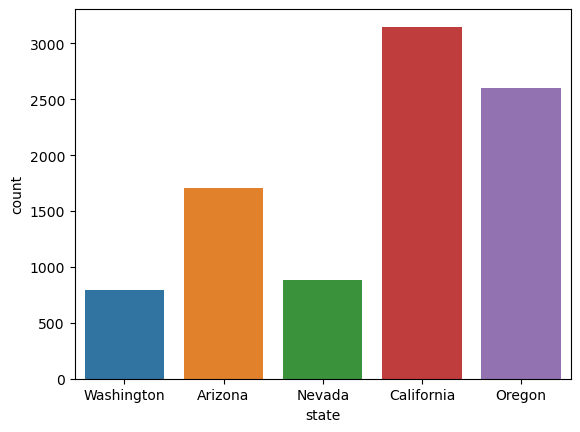

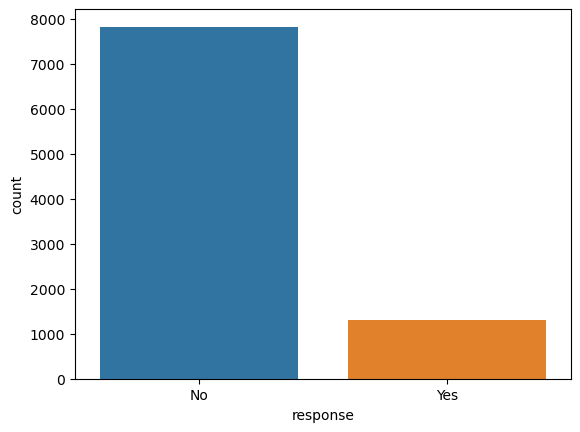

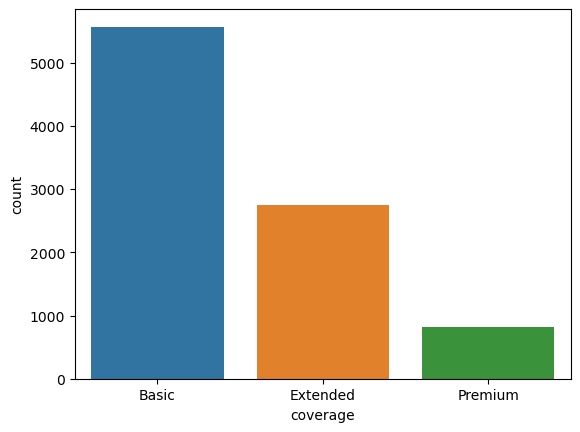

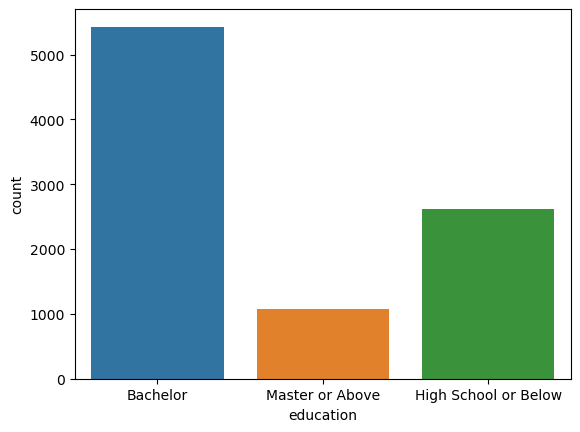

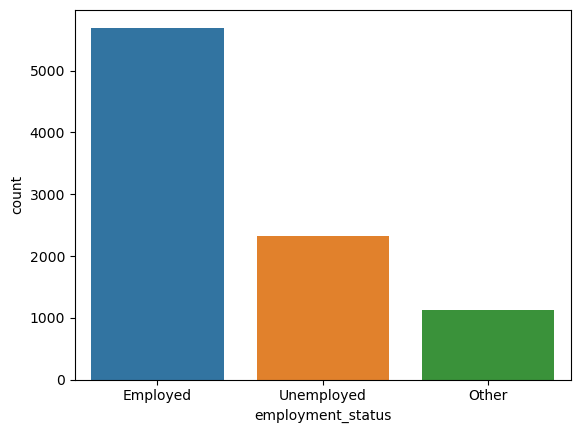

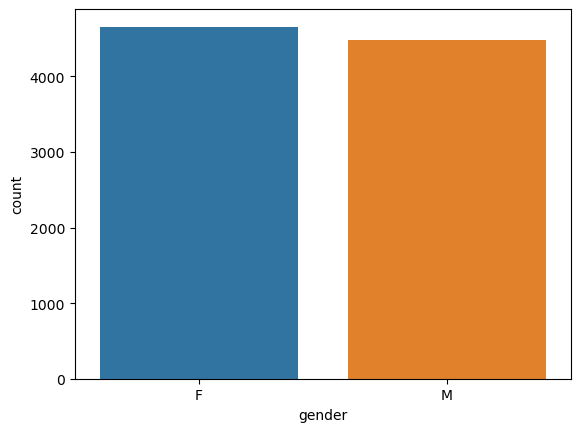

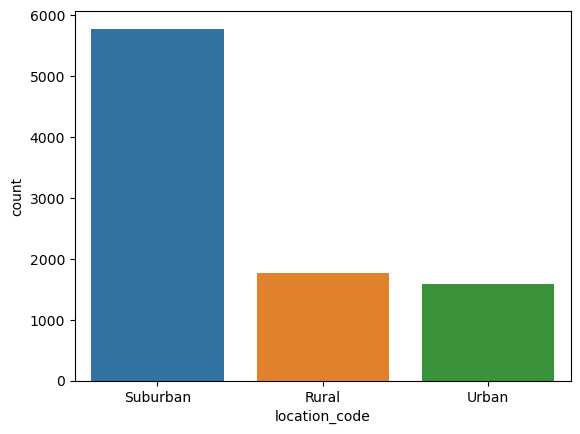

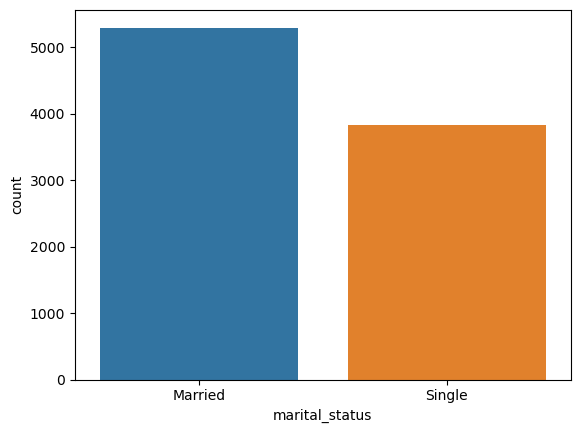

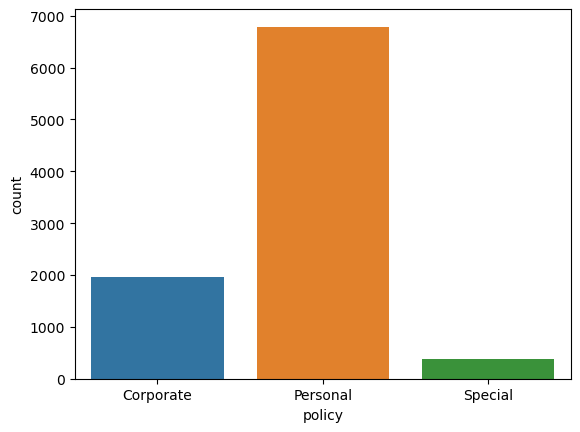

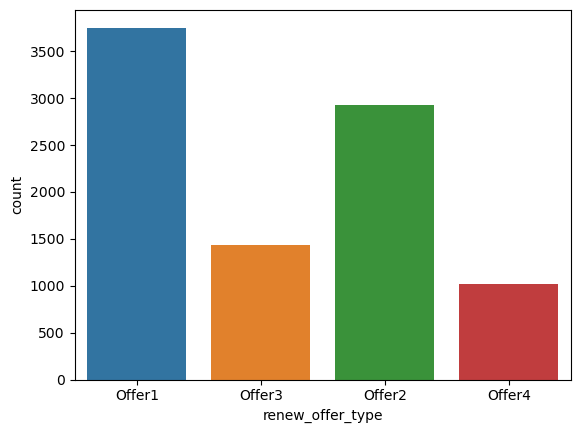

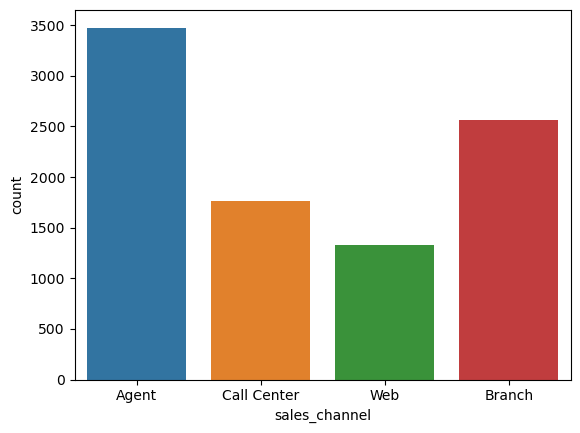

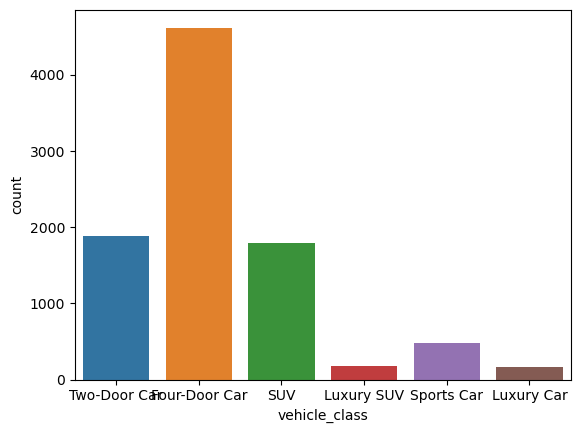

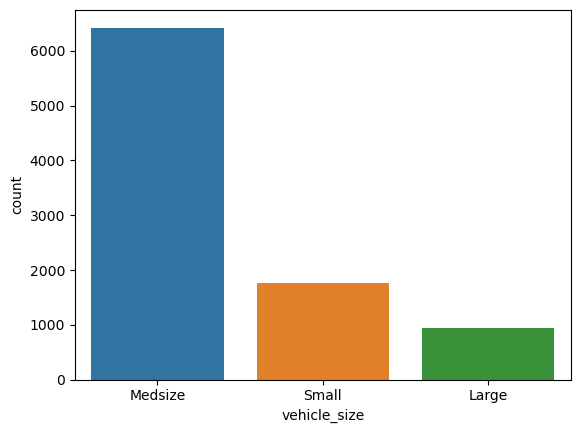

In [233]:
plot_discrete(categorical_df2)

3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

4. Make any changes you feel are necessary.

In [234]:
# Already dropped policy_type and kept policy instead. 
# Combined some values.

5. Plot time variable. Can you extract something from it?

In [235]:
customer_df['effective_to_date'].dtypes

dtype('<M8[ns]')

<Axes: xlabel='effective_to_date'>

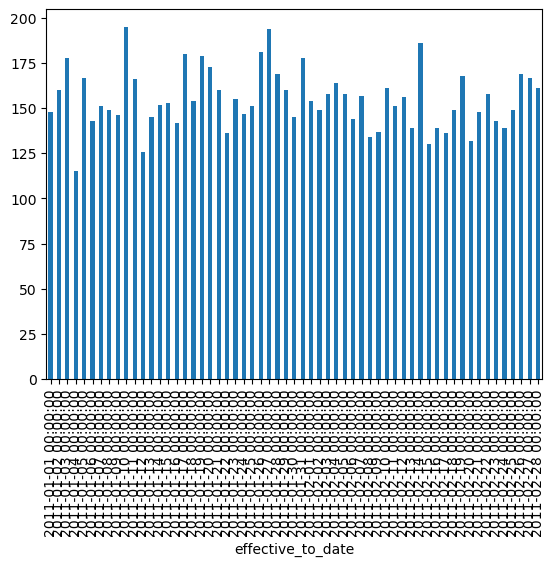

In [236]:
customer_df.groupby('effective_to_date')['customer'].count().plot.bar()

6. The time variable can be useful. You shoud transform its data into a more useful form. Hint: Day, week, and month as integers might be useful.

In [237]:
customer_df['etd_day'] = customer_df['effective_to_date'].dt.day
customer_df['etd_week'] = customer_df['effective_to_date'].dt.isocalendar().week
customer_df['etd_month'] = customer_df['effective_to_date'].dt.month
customer_df['etd_year'] = customer_df['effective_to_date'].dt.year

In [238]:
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,etd_day,etd_week,etd_month,etd_year
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,24,8,2,2011
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,31,5,1,2011
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,19,7,2,2011
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,20,3,1,2011
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,3,5,2,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,10,6,2,2011
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,12,6,2,2011
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,6,5,2,2011
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,3,5,2,2011


**Lab | Comparing regression models**

Instructions
Concatenate Numerical and Categorical dataframes into one dataframe called data.

1. In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

In [401]:
data = pd.concat([numerical_df, categorical_df], axis=1).drop('customer', axis=1)
data.isna().sum().sum()

0

In [402]:
y = data['total_claim_amount']
X = data.drop(['total_claim_amount'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [403]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7307, 20)
(1827, 20)
(7307,)
(1827,)


2. Separate X_train and X_test into numerical and categorical (X_train_cat , X_train_num , X_test_cat , X_test_num)

In [404]:
X_train_cat = X_train.select_dtypes(object)
X_train_num = X_train.select_dtypes(include = np.number)
X_test_cat = X_test.select_dtypes(object)
X_test_num = X_test.select_dtypes(include = np.number)

3. Use X_train_num to fit scalers. Transform BOTH X_train_num and X_test_num.

In [405]:
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(X_train_num)

# normalize X_train_num
x_train_normalized = transformer.transform(X_train_num)
x_train_normalized = pd.DataFrame(x_train_normalized, columns=X_train_num.columns).reset_index()
print(x_train_normalized.shape)

# normalize X_test_num
x_test_normalized = transformer.transform(X_test_num)
x_test_normalized = pd.DataFrame(x_test_normalized, columns=X_test_num.columns).reset_index()
print(x_test_normalized.shape)

(7307, 8)
(1827, 8)


4. Encode the categorical variables X_train_cat and X_test_cat (See the hint below for encoding categorical data!!!)

In [406]:
X_train_cat_onehot = X_train_cat.drop(['coverage', 'employment_status', 'location_code', 'vehicle_size', 'education'], axis=1)
X_test_cat_onehot =  X_test_cat.drop(['coverage', 'employment_status', 'location_code', 'vehicle_size', 'education'], axis=1)
print(X_train_cat_onehot.shape)
print(X_test_cat_onehot.shape)

(7307, 8)
(1827, 8)


In [407]:
# One Hot/Label Encoding (categorical) to convert categorical variables into numerical
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first').fit(X_train_cat_onehot)
cols = encoder.get_feature_names_out(input_features=X_train_cat_onehot.columns)

# encode X_train_cat
X_train_cat_onehot = pd.DataFrame(encoder.transform(X_train_cat_onehot).toarray(),columns=cols)
X_train_cat_onehot = X_train_cat_onehot.reset_index()
print(X_train_cat_onehot.shape)

# encode X_test_cat
X_test_cat_onehot = pd.DataFrame(encoder.transform(X_test_cat_onehot).toarray(),columns=cols)
X_test_cat_onehot = X_test_cat_onehot.reset_index()
print(X_test_cat_onehot.shape)

(7307, 21)
(1827, 21)


In [408]:
# Ordinal encoding catgeorical columns 
X_train_cat_ordinal = X_train_cat[['coverage', 'employment_status', 'location_code', 'vehicle_size', 'education']]

X_train_cat_ordinal["coverage"] = X_train_cat_ordinal["coverage"].replace({"Basic" : 0, "Extended" : 1, "Premium" : 2})
X_train_cat_ordinal["employment_status"] = X_train_cat_ordinal["employment_status"].replace({"Unemployed" : 0, "Other" : 1, "Employed" : 2})
X_train_cat_ordinal["location_code"] = X_train_cat_ordinal["location_code"].replace({"Urban" : 0, "Suburban" : 1, "Rural" : 2})
X_train_cat_ordinal["vehicle_size"] = X_train_cat_ordinal["vehicle_size"].replace({"Small" : 0, "Medsize" : 1, "Large" : 2})
X_train_cat_ordinal["education"] = X_train_cat_ordinal["education"].replace({"High School or Below" : 0, "Bachelor" : 1, "Master or Above" : 2})

X_train_cat_ordinal

/var/folders/mq/9_lx1p317k12454gn9x3s1zm0000gn/T/ipykernel_18364/2777267987.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat_ordinal["coverage"] = X_train_cat_ordinal["coverage"].replace({"Basic" : 0, "Extended" : 1, "Premium" : 2})
/var/folders/mq/9_lx1p317k12454gn9x3s1zm0000gn/T/ipykernel_18364/2777267987.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat_ordinal["employment_status"] = X_train_cat_ordinal["employment_status"].replace({"Unemployed" : 0, "Other" : 1, "Employed" :

,coverage,employment_status,location_code,vehicle_size,education
5123,0,2,0,1,1
7738,1,0,1,1,1
214,0,2,1,0,1
8580,0,2,0,1,1
7857,0,2,1,1,1
...,...,...,...,...,...
5734,0,2,1,0,1
5191,0,1,1,1,1
5390,1,0,1,1,0
860,1,0,1,1,1


In [409]:
X_test_cat_ordinal = X_test_cat[['coverage', 'employment_status', 'location_code', 'vehicle_size', 'education']]

X_test_cat_ordinal["coverage"] = X_test_cat_ordinal["coverage"].replace({"Basic" : 0, "Extended" : 1, "Premium" : 2})
X_test_cat_ordinal["employment_status"] = X_test_cat_ordinal["employment_status"].replace({"Unemployed" : 0, "Other" : 1, "Employed" : 2})
X_test_cat_ordinal["location_code"] = X_test_cat_ordinal["location_code"].replace({"Urban" : 0, "Suburban" : 1, "Rural" : 2})
X_test_cat_ordinal["vehicle_size"] = X_test_cat_ordinal["vehicle_size"].replace({"Small" : 0, "Medsize" : 1, "Large" : 2})
X_test_cat_ordinal["education"] = X_test_cat_ordinal["education"].replace({"High School or Below" : 0, "Bachelor" : 1, "Master or Above" : 2})


X_test_cat_ordinal

/var/folders/mq/9_lx1p317k12454gn9x3s1zm0000gn/T/ipykernel_18364/1008573392.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat_ordinal["coverage"] = X_test_cat_ordinal["coverage"].replace({"Basic" : 0, "Extended" : 1, "Premium" : 2})
/var/folders/mq/9_lx1p317k12454gn9x3s1zm0000gn/T/ipykernel_18364/1008573392.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_cat_ordinal["employment_status"] = X_test_cat_ordinal["employment_status"].replace({"Unemployed" : 0, "Other" : 1, "Employed" : 2})

,coverage,employment_status,location_code,vehicle_size,education
708,0,2,2,1,0
47,0,2,1,1,0
3995,1,2,1,0,1
1513,1,2,0,1,1
3686,0,1,1,1,0
...,...,...,...,...,...
4855,0,2,1,1,1
1880,0,2,2,2,0
8472,0,2,2,1,1
5967,0,0,1,0,0


5. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [410]:
X_train_cat_onehot = X_train_cat_onehot.reset_index()
X_train_cat_ordinal = X_train_cat_ordinal.reset_index()
X_test_cat_onehot = X_test_cat_onehot.reset_index()
X_test_cat_ordinal = X_test_cat_ordinal.reset_index()

In [411]:
X_train = pd.concat([x_train_normalized, X_train_cat_onehot, X_train_cat_ordinal], axis=1)
X_test = pd.concat([x_test_normalized, X_test_cat_onehot, X_test_cat_ordinal], axis=1)

In [412]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7307, 36)
(1827, 36)
(7307,)
(1827,)


In [417]:
X_train.drop(['index', 'level_0', 'index', 'index'], axis=1, inplace=True)

In [419]:
X_test.drop(['index', 'level_0', 'index', 'index'], axis=1, inplace=True)

In [421]:
X_train.dtypes.unique()

array([dtype('float64'), dtype('int64')], dtype=object)

In [422]:
X_test.dtypes.unique()

array([dtype('float64'), dtype('int64')], dtype=object)

6. Try a simple linear regression with all the data to see whether we are getting good results.

In [423]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [426]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.6265922923376483

In [427]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.6118363919895531

7. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

In [439]:
def models(X, y):

    from sklearn import linear_model
    from sklearn.metrics import r2_score

    lm = linear_model.LinearRegression()
    lm.fit(X_train,y_train)

    predictions = lm.predict(X_train)
    r2_score_train = r2_score(y_train, predictions)
    print('LinearRegression train score is: ', r2_score_train)
    predictions_test = lm.predict(X_test)
    r2_score_test = r2_score(y_test, predictions_test)
    print('LinearRegression test score is: ', r2_score_test)
    
#     scores = []
#     for k in range(2,25):
#         model = KNeighborsRegressor(n_neighbors=k, weights='distance')
#         model.fit(X_train, y_train)
#         scores.append(model.score(X_test, y_test))

    from sklearn.neighbors import KNeighborsRegressor

    KNN = KNeighborsRegressor(n_neighbors=6)
    KNN.fit(X_train, y_train)
    KNN_score_train = KNN.score(X_train, y_train)
    print('KNeighborsRefressor train score is: ', KNN_score_train)
    KNN_score_test = KNN.score(X_test, y_test)
    print('KNeighborsRefressor test score is: ', KNN_score_test)



8. Use the function to check LinearRegressor and KNeighborsRegressor.

In [441]:
models(X_train, y_train)

LinearRegression train score is:  0.6265922923376483
LinearRegression test score is:  0.6118363919895531
KNeighborsRefressor train score is:  0.7191715338635755
KNeighborsRefressor test score is:  0.6237626832743766


9. You can check also the MLPRegressor for this task!

In [443]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

regr = MLPRegressor(random_state=42, max_iter=500).fit(X_train, y_train)
regr.predict(X_test)
regr.score(X_test, y_test)

/Users/landy/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7997325209656092

10. Check and discuss the results.

**Lab | Random variable distributions**
Refer to the numerical.csv dataset that you previously saved.

Instructions
1. Use the numerical variables from our dataset this week.

In [444]:
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

In [ ]:
# exponential distribution: monthly premium auto, number of open complaints, number of policies, total claim amount, customer_lifetime_value before transformation
# normal distribution: customer_lifetime_value_transformed

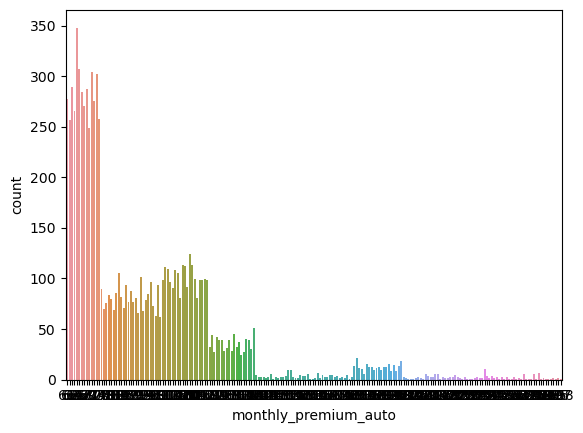

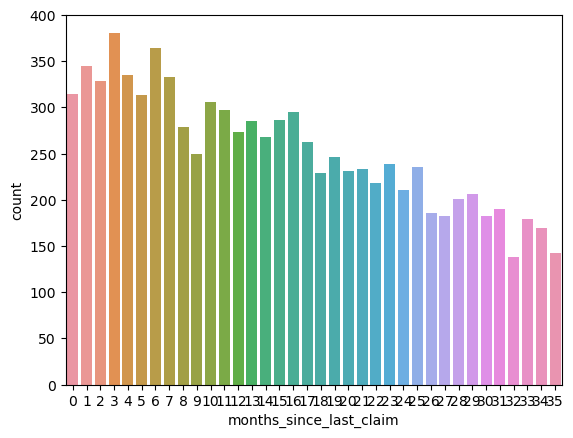

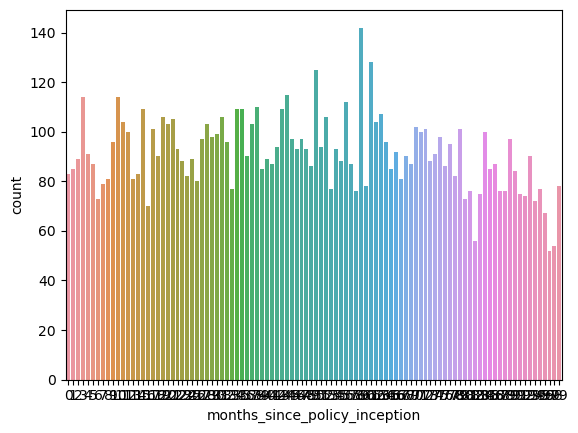

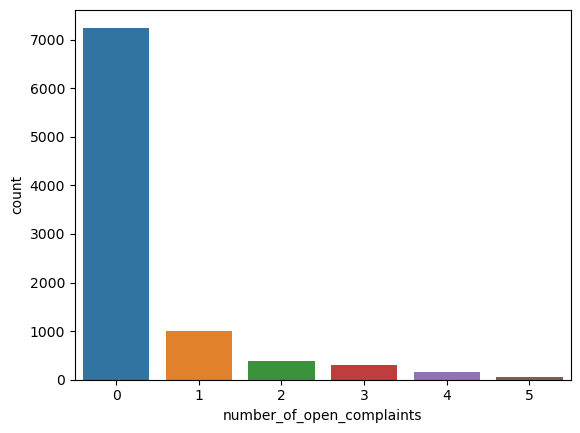

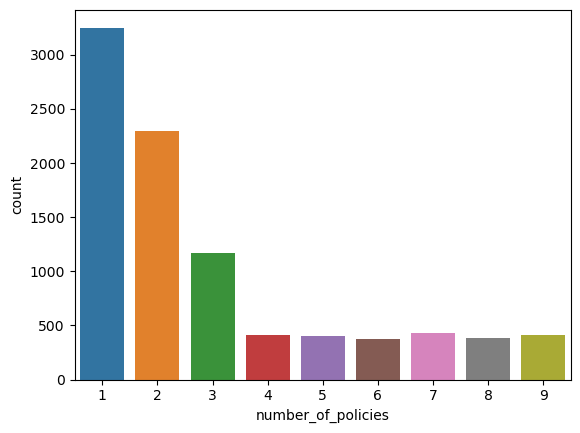

In [457]:
plot_discrete(discrete_df)

In [473]:
continuous_df.head()

,customer_lifetime_value,income,total_claim_amount,customer_lifetime_value_transformed,total_claim_amount_transformed
0,2763.519279,56274,384.811147,7.924260,5.952753
1,6979.535903,0,1131.464935,8.850738,7.031268
2,12887.431650,48767,566.472247,9.464008,6.339428
3,7645.861827,0,529.881344,8.941920,6.272653
4,2813.692575,43836,138.130879,7.942253,4.928202


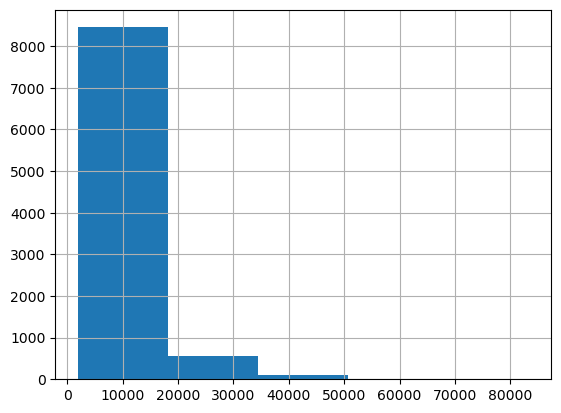

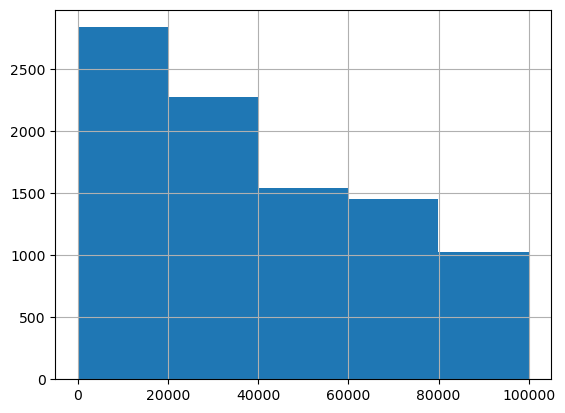

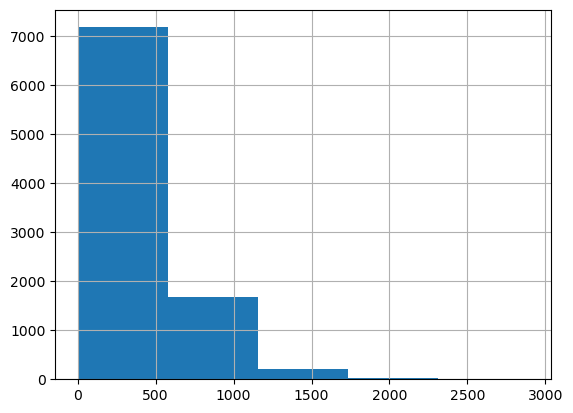

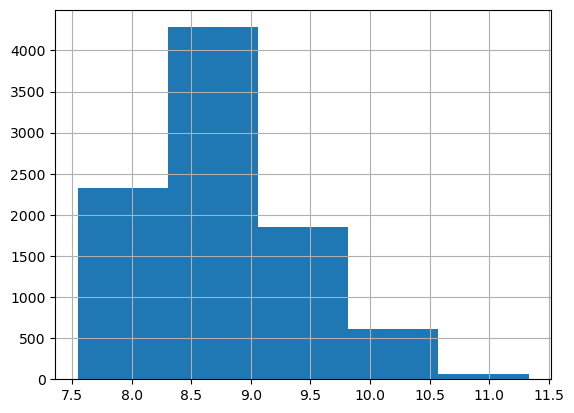

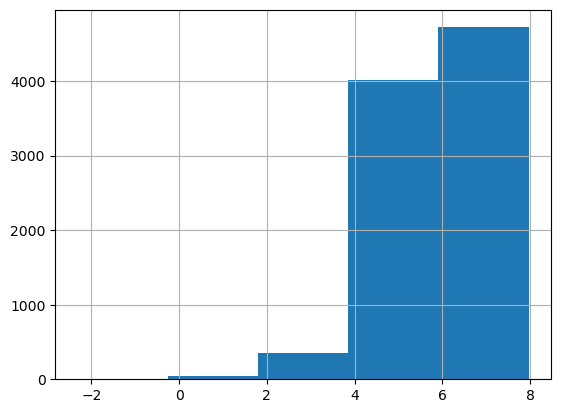

In [475]:
plot_continuous(continuous_df)

3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

<Axes: xlabel='customer_lifetime_value_transformed', ylabel='Count'>

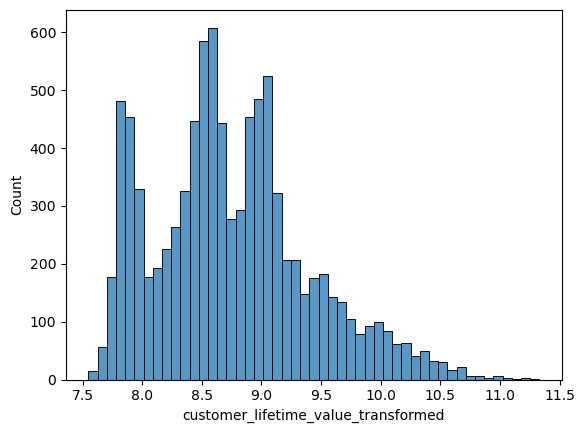

In [461]:
sns.histplot(continuous_df['customer_lifetime_value_transformed'])

<Axes: xlabel='total_claim_amount_transformed', ylabel='Count'>

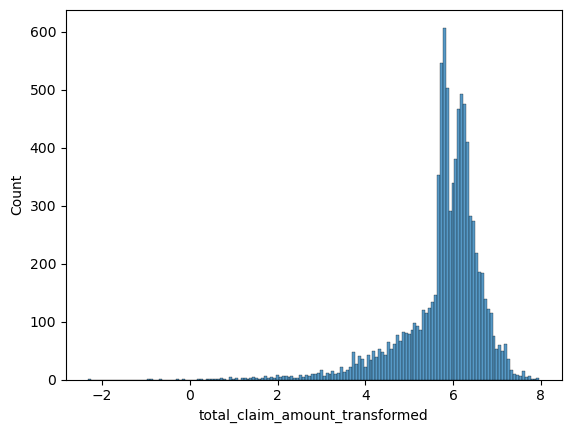

In [476]:
sns.histplot(continuous_df['total_claim_amount_transformed'])